# Лабораторная работа 5. Эвристические алгоритмы Вариант 4
Цель работы: ознакомление с эвристическими алгоритмами и методикой оценки их эффективности.

## Задание 1
Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.

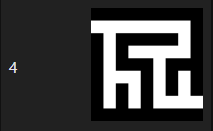

а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

## Реализация алгоритма

## Формат решения:

|<!-- -->|<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |
|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|9       |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |
|8       |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9632;  |
|7       |&#9632;  |&#9633;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9633;  |&#9632;  |
|6       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |&#9632;  |
|5       |&#9632;  |&#9633;  |&#9632;  |&#9632;  |&#9632;  |&#9633;  |&#9632;  |&#9632;  |&#9632;  |
|4       |&#9632;  |&#9633;  |&#9633;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |
|3       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |
|2       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9633;  |&#9633;  |&#9633;  |
|1       |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |
|<!-- -->|1        |2        |3        |4        |5        |6        |7        |8        |9        |


### Решение

|<!-- -->|<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |<!-- --> |
|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|9       |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |
|8       |&#128997;  |&#128997;  |&#128997;  |&#128997;  |&#128997;  |&#128997;  |&#128997;  |&#128997;  |&#9632;  |
|7       |&#9632;  |&#9633;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#128997;  |&#9632;  |
|6       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9633;  |&#128997;  |&#128997;  |&#128997;  |&#9632;  |
|5       |&#9632;  |&#9633;  |&#9632;  |&#9632;  |&#9632;  |&#128997;  |&#9632;  |&#9632;  |&#9632;  |
|4       |&#9632;  |&#9633;  |&#9633;  |&#9633;  |&#9632;  |&#128997;  |&#9632;  |&#9633;  |&#9632;  |
|3       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#128997;  |&#9632;  |&#9633;  |&#9632;  |
|2       |&#9632;  |&#9633;  |&#9632;  |&#9633;  |&#9632;  |&#128997;  |&#128997;  |&#128997;  |&#128997;  |
|1       |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |&#9632;  |
|<!-- -->|1        |2        |3        |4        |5        |6        |7        |8        |9        |


## Волновой алгоритм

In [9]:
from collections import deque

def find_optimal_path(labirint, start, end):
    rows = len(labirint)
    cols = len(labirint[0])

    queue = deque()
    queue.append(start)

    distances = [[float('inf')] * cols for _ in range(rows)]
    distances[start[0]][start[1]] = 0

    while queue:
        row, col = queue.popleft()
        current_distance = distances[row][col]

        if (row, col) == end:
            break

        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_row, new_col = row + dr, col + dc

            if 0 <= new_row < rows and 0 <= new_col < cols and labirint[new_row][new_col] == 0 and distances[new_row][new_col] == float('inf'):
                distances[new_row][new_col] = current_distance + 1
                queue.append((new_row, new_col))

    if distances[end[0]][end[1]] == float('inf'):
        return None

    path = []
    row, col = end
    while (row, col) != start:
        path.append((row, col))
        current_distance = distances[row][col]

        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_row, new_col = row + dr, col + dc

            if 0 <= new_row < rows and 0 <= new_col < cols and distances[new_row][new_col] == current_distance - 1:
                row, col = new_row, new_col
                break

    path.append(start)
    path.reverse()

    return path

# Пример использования
labirint = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

start = (1, 0)  # Начальное положение в лабиринте
end = (7, 8)  # Конечное положение в лабиринте

optimal_path = find_optimal_path(labirint, start, end)

if optimal_path:
    print("Оптимальный путь:")
    for position in optimal_path:
        print(position)
else:
    print("Конечная позиция недостижима.")


Оптимальный путь:
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(2, 7)
(3, 7)
(3, 6)
(3, 5)
(4, 5)
(5, 5)
(6, 5)
(7, 5)
(7, 6)
(7, 7)
(7, 8)


## Маршрутный алгоритм

In [12]:
import heapq

def find_optimal_path(labirint, start, end):
    rows = len(labirint)
    cols = len(labirint[0])

    vertices = {}
    vertices[start] = {'distance': 0, 'previous': None}

    queue = []
    heapq.heappush(queue, (0, start))

    while queue:
        current_distance, current_vertex = heapq.heappop(queue)

        if current_vertex == end:
            break

        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_row, new_col = current_vertex[0] + dr, current_vertex[1] + dc

            if 0 <= new_row < rows and 0 <= new_col < cols and labirint[new_row][new_col] == 0:
                new_vertex = (new_row, new_col)
                new_distance = current_distance + 1

                if new_vertex not in vertices or new_distance < vertices[new_vertex]['distance']:
                    vertices[new_vertex] = {'distance': new_distance, 'previous': current_vertex}
                    heapq.heappush(queue, (new_distance, new_vertex))

    if end not in vertices:
        return None

    path = []
    current_vertex = end
    while current_vertex:
        path.append(current_vertex)
        current_vertex = vertices[current_vertex]['previous']

    path.reverse()
    return path

# Пример использования
labirint = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

start = (1, 0)  # Начальное положение в лабиринте
end = (7, 8)  # Конечное положение в лабиринте

optimal_path = find_optimal_path(labirint, start, end)

if optimal_path:
    print("Оптимальный путь:")
    for position in optimal_path:
        print(position)
else:
    print("Конечное положение недостижимо.")


Оптимальный путь:
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(2, 7)
(3, 7)
(3, 6)
(3, 5)
(4, 5)
(5, 5)
(6, 5)
(7, 5)
(7, 6)
(7, 7)
(7, 8)


## Задание 2

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт

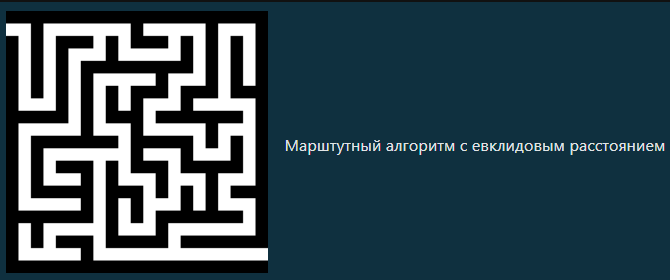

In [14]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


def get_neighboring_cells(point):
    x, y = point
    return [(x-1, y), (x+1, y), (x, y-1), (x, y+1), (x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)]


def astar(maze, start, goal):
    open_set = {start}
    came_from = {}
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    while open_set:
        current = min(open_set, key=lambda x: f_score[x])

        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path
        
        open_set.remove(current)

        for neighbor in get_neighboring_cells(current):
            nx, ny = neighbor

            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != '#':
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                    open_set.add(neighbor)

    return None

maze = [['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'], 
        [' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', '#', '#'],
        ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#'],
        ['#', '#', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#'],
        ['#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', '#', '#'],
        ['#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
        ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']]

start = (1, 0)
goal = (19, 20)

path = astar(maze, start, goal)

if path:
    print("Путь найден: ", path, '\n')
    for step in path:
        x, y = step
        maze[x][y] = '.'

    for row in maze:
        print(' '.join(row))
else:
    print("Путь не найден.")


Путь найден:  [(1, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 4), (1, 5), (1, 6), (2, 7), (1, 8), (2, 9), (3, 10), (3, 11), (3, 12), (2, 13), (1, 14), (2, 15), (3, 15), (4, 15), (5, 14), (6, 13), (7, 12), (8, 11), (9, 12), (9, 13), (9, 14), (10, 15), (11, 16), (10, 17), (9, 18), (10, 19), (11, 19), (12, 19), (13, 18), (14, 17), (15, 18), (16, 19), (17, 18), (17, 17), (17, 16), (17, 15), (17, 14), (18, 13), (19, 14), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (19, 20)] 

# # # # # # # # # # # # # # # # # # # # #
.   #   . . .   .   #       .   #       #
# . # . # # # . # . # # # . # . #   #   #
# . # . #       #   . . .   # . #   #   #
# . # . #   # # # # # # # # # . #   #   #
# . # . #   #           #   .   #   #   #
# . # . #   #   #   # # # . # # #   # # #
#   .   #   #   #   #   .   #           #
# # # # #   #   # # # . # # # # # # #   #
#           #       #   . . .   #   .   #
#   # # # # # # #   # # # # # . # . # . #
#  